In [1]:
from src import config
from src.hand_analysis.runner.run_hand_analysis import run_analysis_with_configuration_parameters

analysis = run_analysis_with_configuration_parameters(config.DATA_DIR)
experiment = analysis.experiment

2025-04-25 19:35:02,278 [INFO] root: Processing subject: 0001, group: control
2025-04-25 19:35:02,489 [INFO] root: Processing subject: 0002, group: control
2025-04-25 19:35:02,690 [INFO] root: Processing subject: 0003, group: MCI
2025-04-25 19:35:02,835 [INFO] root: Processing subject: 0004, group: MCI
2025-04-25 19:35:03,029 [INFO] root: Processing subject: 0005, group: MCI
2025-04-25 19:35:03,249 [INFO] root: Processing subject: 0006, group: control
2025-04-25 19:35:03,376 [INFO] root: Processing subject: 0007, group: control
2025-04-25 19:35:03,513 [INFO] root: Processing subject: 0008, group: MCI
2025-04-25 19:35:03,732 [INFO] root: Processing subject: 0009, group: MCI
2025-04-25 19:35:03,861 [INFO] root: Processing subject: 0010, group: control
2025-04-25 19:35:03,976 [INFO] root: Processing subject: 0011, group: MCI
2025-04-25 19:35:04,230 [INFO] root: Processing subject: 0012, group: MCI
2025-04-25 19:35:04,367 [INFO] root: Processing subject: 0013, group: MCI
2025-04-25 19:35:0

Metrics DataFrame:
  subject_id  trial_id trial_type  age gender  is_valid  \
0       0001         8     PART_A   35      M      True   
1       0001         7     PART_B   35      M      True   
2       0001        11     PART_A   35      M      True   
3       0001        21     PART_B   35      M      True   
4       0001         1     PART_A   35      M      True   

   trial_order_of_appearance  speed_threshold  total_distance     rt  ...  \
0                          2         0.262139        3.756078  18105  ...   
1                          3         0.262139        3.451943  18091  ...   
2                          4         0.262139        3.522551  15807  ...   
3                          5         0.262139        3.349920  21544  ...   
4                          6         0.262139        3.910085  18099  ...   

   travel_avg_speed  search_avg_speed  state_transitions  hesitation_ratio  \
0          0.702588          0.215688               26.0          0.654418   
1      

In [7]:
subject = experiment.subjects["0063"]
subject

TMTSubject(training_trials=[], testing_trials=[TMTTrial(stimuli=[TMTTarget(content='1', position=Coordinate(x=-0.20191733333333317, y=-0.2820346666666667)), TMTTarget(content='2', position=Coordinate(x=-0.1183973333333332, y=-0.3655546666666667)), TMTTarget(content='3', position=Coordinate(x=-0.14623733333333336, y=-0.1706746666666666)), TMTTarget(content='4', position=Coordinate(x=-0.25759733333333334, y=-0.11499466666666662)), TMTTarget(content='5', position=Coordinate(x=-0.007037333333333234, y=-0.1706746666666666)), TMTTarget(content='6', position=Coordinate(x=0.16000266666666654, y=-0.11499466666666662)), TMTTarget(content='7', position=Coordinate(x=0.2435226666666667, y=0.13556533333333332)), TMTTarget(content='8', position=Coordinate(x=0.38272266666666666, y=0.24692533333333327)), TMTTarget(content='9', position=Coordinate(x=0.2713626666666667, y=-0.059314666666666634)), TMTTarget(content='10', position=Coordinate(x=0.41056266666666663, y=0.1634053333333333)), TMTTarget(content=

In [20]:

from neurotask.tmt.metrics import calculate_speeds_between_cursor_positions, \
    calculate_accelerations_between_cursor_positions
from matplotlib import pyplot as plt
from build.lib.neurotask.tmt.model.tmt_model import TMTTrial


def plot_with_color(trial: TMTTrial, canvas_size: int, target_radius: float, color_by='time'):
    """
    Plotea la trayectoria del cursor junto con los targets en un gráfico,
    ajustando el tamaño del gráfico al tamaño del canvas y dibujando círculos
    alrededor de los targets con su contenido. La trayectoria del cursor se
    dibuja con puntos cuyos colores cambian en función del tiempo, la velocidad o la aceleración.
    El primer clic en el target se destaca con un marcador especial.

    Parameters:
    - trial: TMTTrial, el trial con la trayectoria del cursor y los targets.
    - canvas_size: int, tamaño del canvas (ancho y alto).
    - target_radius: float, radio de los círculos que rodean los targets.
    - color_by: str, 'time', 'speed' o 'acceleration', determina si el color de los puntos cambia en función del tiempo, velocidad o aceleración.
    """

    # Extraer la posición de los targets
    target_x = [target.position.x for target in trial.stimuli]
    target_y = [target.position.y for target in trial.stimuli]
    target_contents = [target.content for target in trial.stimuli]

    cursor_trail_from_first_click = trial.get_cursor_trail_from_start()
    # Extraer la trayectoria del cursor
    cursor_x = [cursor_info.position.x for cursor_info in cursor_trail_from_first_click]
    cursor_y = [cursor_info.position.y for cursor_info in cursor_trail_from_first_click]
    cursor_times = [cursor_info.time for cursor_info in cursor_trail_from_first_click]

    if color_by == 'time':
        # Normalizar tiempos para que estén en el rango [0, 1]
        norm = plt.Normalize(min(cursor_times), max(cursor_times))
        colors = plt.cm.viridis(norm(cursor_times))  # Usar un mapa de colores para el tiempo
    elif color_by == 'speed':
        speeds = calculate_speeds_between_cursor_positions(trial)
        speeds = [0] + speeds  # Para igualar el número de puntos con las velocidades calculadas
        norm = plt.Normalize(min(speeds), max(speeds))
        colors = plt.cm.viridis(norm(speeds))  # Usar un mapa de colores para la velocidad
    elif color_by == 'acceleration':
        accelerations = calculate_accelerations_between_cursor_positions(trial)
        accelerations = [0, 0] + accelerations  # Igualar el número de puntos (2 primeros puntos sin aceleración)
        norm = plt.Normalize(min(accelerations), max(accelerations))
        colors = plt.cm.viridis(norm(accelerations))  # Usar un mapa de colores para la aceleración
    else:
        raise ValueError("El parámetro color_by debe ser 'time', 'speed' o 'acceleration'.")

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(8, 8))

    # Dibujar la trayectoria del cursor como líneas coloreadas por tiempo o velocidad
    for i in range(len(cursor_x) - 1):
        plt.plot([cursor_x[i], cursor_x[i + 1]],
                 [cursor_y[i], cursor_y[i + 1]],
                 color=colors[i], linewidth=2, zorder=4)

    # Dibujar los targets como círculos con el contenido dentro
    for x, y, content in zip(target_x, target_y, target_contents):
        circle = plt.Circle((x, y), target_radius, color='red', alpha=0.3, zorder=5)
        plt.gca().add_patch(circle)
        # Añadir el contenido del target en el centro del círculo
        plt.text(x, y, content, color='black', fontsize=8, ha='center', va='center', zorder=6)

    # Destacar el primer clic
    if trial.start:
        fc_x = trial.start.position.x
        fc_y = trial.start.position.y
        plt.scatter(fc_x, fc_y, color='cyan', edgecolor='black', s=100, label='First Click', zorder=7,
                    marker='o', alpha=0.3)

    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])
    cbar_label = 'Time' if color_by == 'time' else 'Speed' if color_by == 'speed' else 'Acceleration'
    cbar = fig.colorbar(sm, ax=ax, label=cbar_label)

    # # Set plot limits based on canvas size
    # ax.set_xlim(-canvas_size, canvas_size)
    # ax.set_ylim(canvas_size, -canvas_size,)  # Inverted Y-axis if needed

    # Add labels and title
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_title('Cursor Trail with Targets')

    # Ensure equal aspect ratio
    ax.set_aspect('equal', adjustable='box')

    # Add legend
    ax.legend()

    return fig

In [29]:
from src.hand_analysis.loader.load_last_split import load_last_analysis
train_set, _ = load_last_analysis()
subject_analysis = train_set[train_set['subject_id'] == 63]
subject_analysis

2025-04-25 19:48:02,085 [INFO] root: Loading split from /home/gianluca/Research/tmt-analysis/data/hand_analysis/2025-04-25_13-41-47


,subject_id,trial_id,trial_type,is_valid,trial_order_of_appearance,speed_threshold,total_distance,rt,correct_targets_touches,wrong_targets_touches,...,hesitation_ratio,total_hesitations,average_duration,max_duration,hesitation_periods,number_of_crosses,invalid_cause,sex,age,group
980,63,7,PART_A,True,2,0.204387,3.329216,20958,15.0,3.0,...,0.185277,3.0,0.177911,0.233523,"[0.20021900022402406, 0.09999060025438666, 0.2...","(0, [])",NaN,F,52,HC
981,63,12,PART_B,True,3,0.204387,2.509790,25028,10.0,0.0,...,0.000000,0.0,0.000000,0.000000,[],"(0, [])",NaN,F,52,HC
982,63,1,PART_A,True,4,0.204387,5.191925,23676,14.0,8.0,...,0.266739,4.0,0.300005,0.833533,"[0.09983679978176951, 0.8335334998555481, 0.10...","(0, [])",NaN,F,52,HC
983,63,20,PART_B,True,5,0.204387,3.428806,22257,15.0,3.0,...,0.065441,1.0,0.168803,0.168803,[0.1688031000085175],"(0, [])",NaN,F,52,HC
984,63,11,PART_A,True,6,0.204387,3.653822,19301,15.0,3.0,...,0.000000,0.0,0.000000,0.000000,[],"(0, [])",NaN,F,52,HC
985,63,13,PART_B,True,7,0.204387,3.733872,18216,15.0,2.0,...,0.000000,0.0,0.000000,0.000000,[],"(0, [])",NaN,F,52,HC
986,63,17,PART_A,True,8,0.204387,3.023647,17425,15.0,3.0,...,0.000000,0.0,0.000000,0.000000,[],"(0, [])",NaN,F,52,HC
987,63,0,PART_B,True,9,0.204387,3.661062,20223,14.0,3.0,...,0.124510,2.0,0.183428,0.333517,"[0.33351660007610917, 0.03333899984136224]","(0, [])",NaN,F,52,HC
988,63,5,PART_A,True,10,0.204387,4.285932,18688,15.0,5.0,...,0.310341,2.0,0.566851,0.666874,"[0.6668742997571826, 0.46682720026001334]","(0, [])",NaN,F,52,HC
989,63,10,PART_B,True,11,0.204387,3.840618,22569,15.0,5.0,...,0.012562,1.0,0.033307,0.033307,[0.03330660006031394],"(0, [])",NaN,F,52,HC


Trial ID: 7
Trial Type: TrialType.PART_A
Trial order: 2
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 3.0


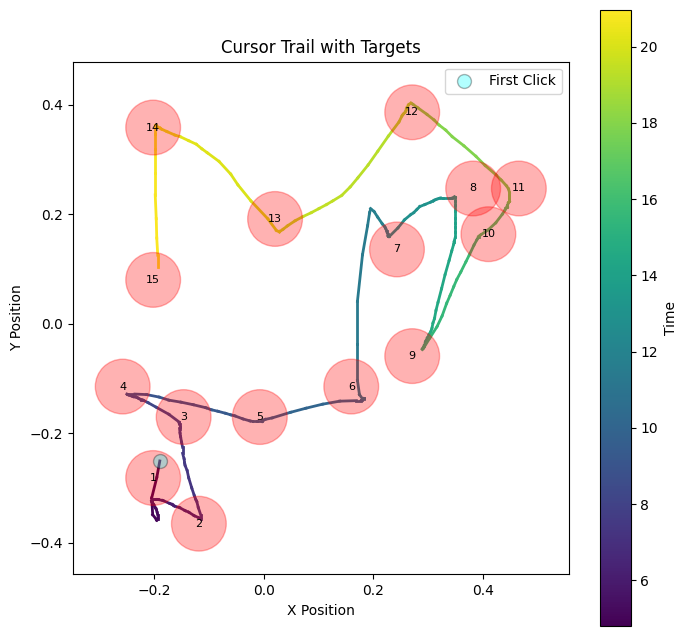

Trial ID: 12
Trial Type: TrialType.PART_B
Trial order: 3
Correct targets touches from analysis: 10.0
Wrong targets touches from analysis: 0.0


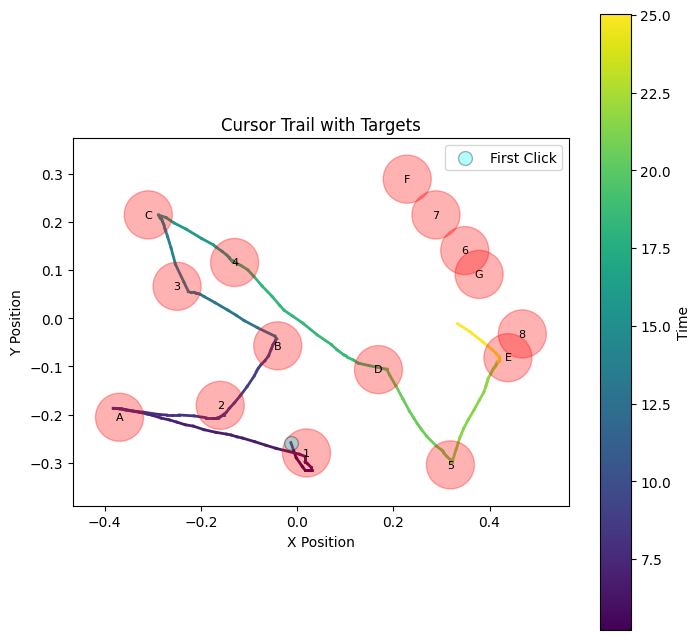

Trial ID: 1
Trial Type: TrialType.PART_A
Trial order: 4
Correct targets touches from analysis: 14.0
Wrong targets touches from analysis: 8.0


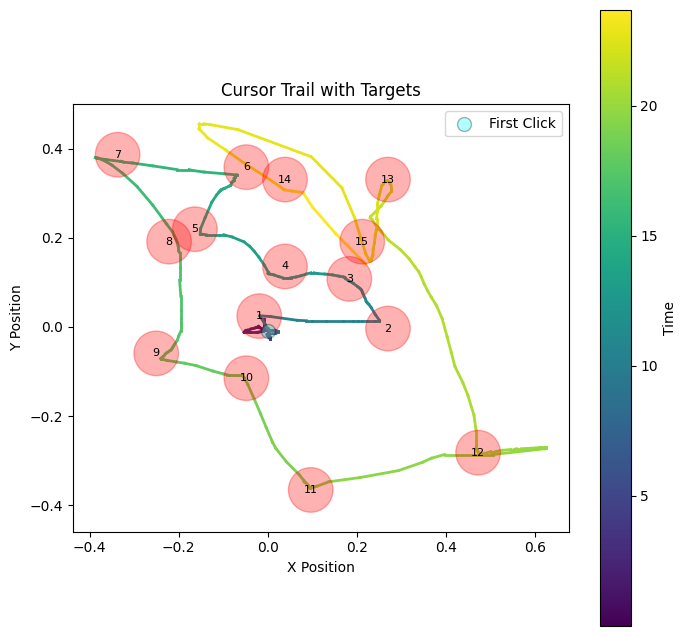

Trial ID: 20
Trial Type: TrialType.PART_B
Trial order: 5
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 3.0


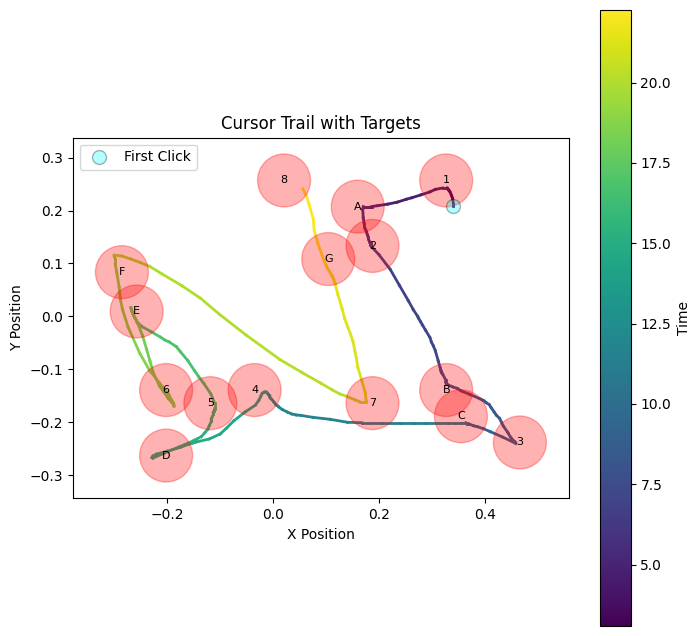

Trial ID: 11
Trial Type: TrialType.PART_A
Trial order: 6
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 3.0


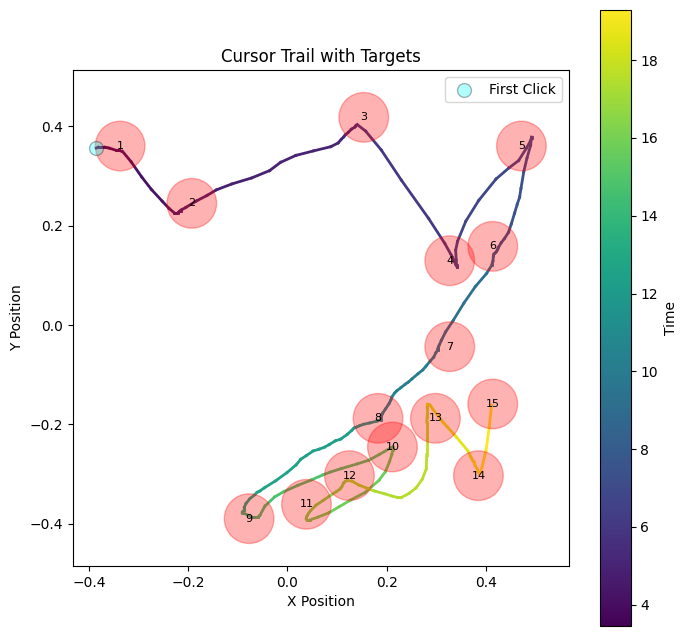

Trial ID: 13
Trial Type: TrialType.PART_B
Trial order: 7
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 2.0


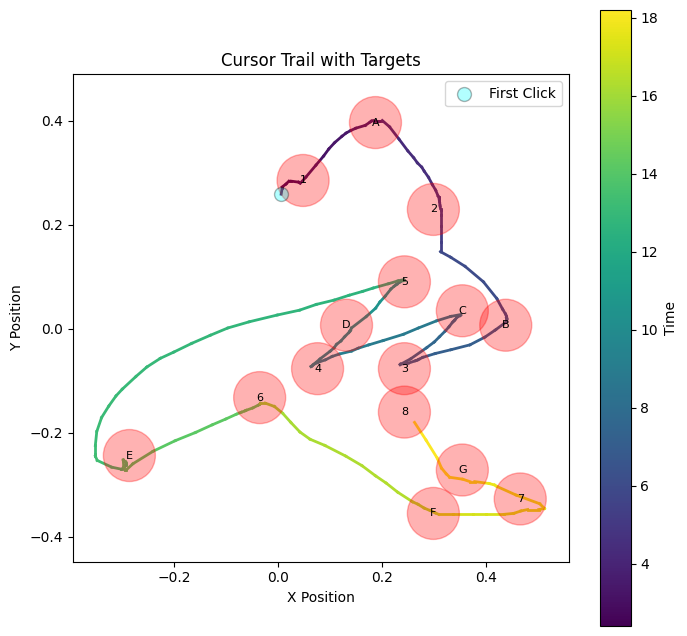

Trial ID: 17
Trial Type: TrialType.PART_A
Trial order: 8
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 3.0


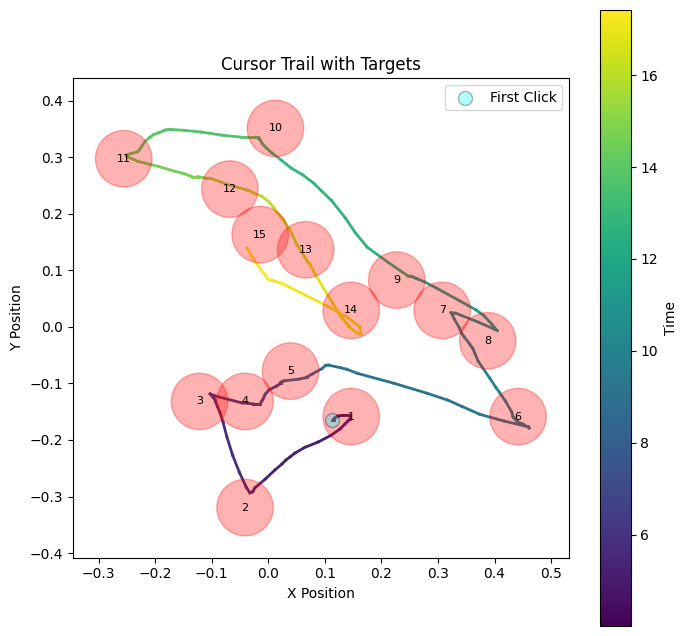

Trial ID: 0
Trial Type: TrialType.PART_B
Trial order: 9
Correct targets touches from analysis: 14.0
Wrong targets touches from analysis: 3.0


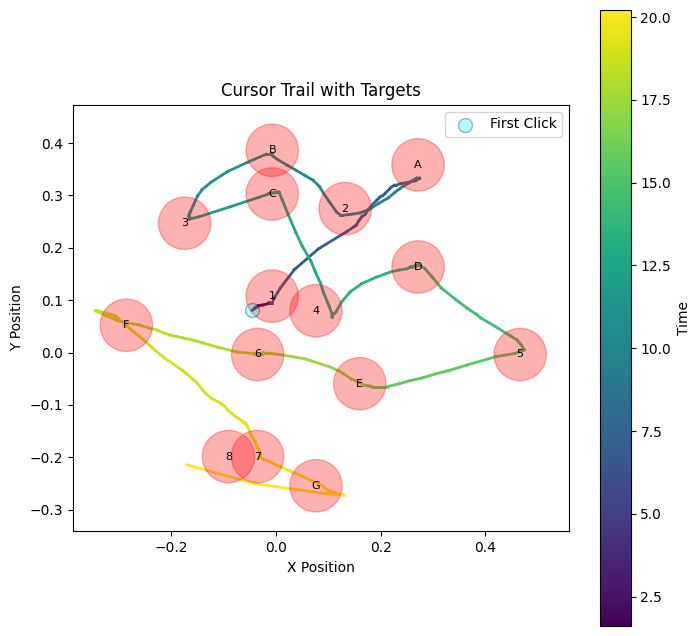

Trial ID: 5
Trial Type: TrialType.PART_A
Trial order: 10
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 5.0


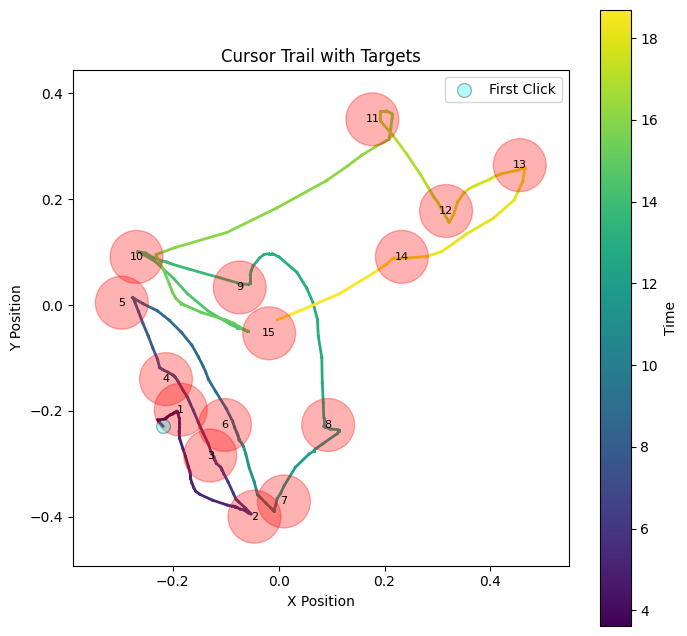

Trial ID: 10
Trial Type: TrialType.PART_B
Trial order: 11
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 5.0


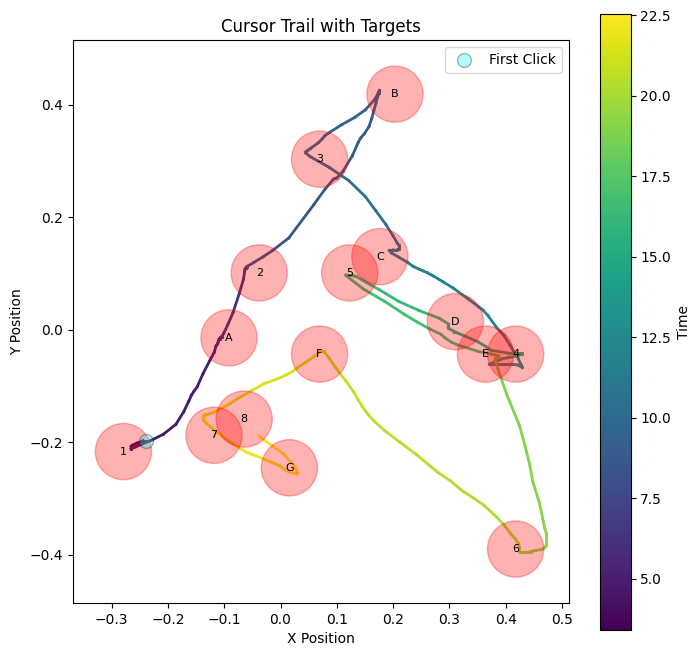

Trial ID: 9
Trial Type: TrialType.PART_A
Trial order: 12
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 0.0


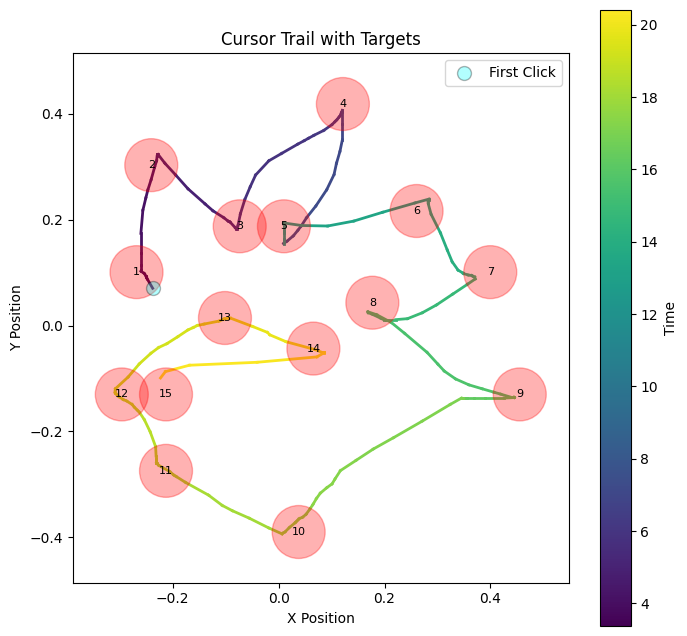

Trial ID: 16
Trial Type: TrialType.PART_B
Trial order: 13
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 1.0


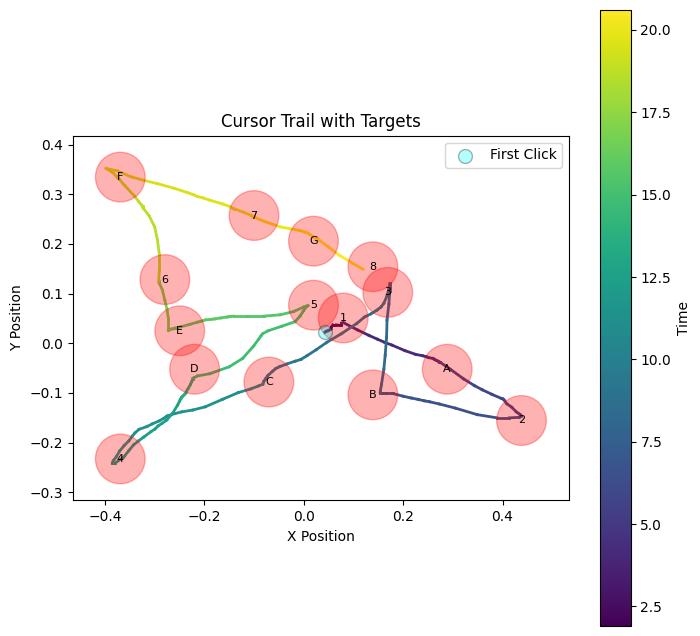

Trial ID: 15
Trial Type: TrialType.PART_A
Trial order: 14
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 1.0


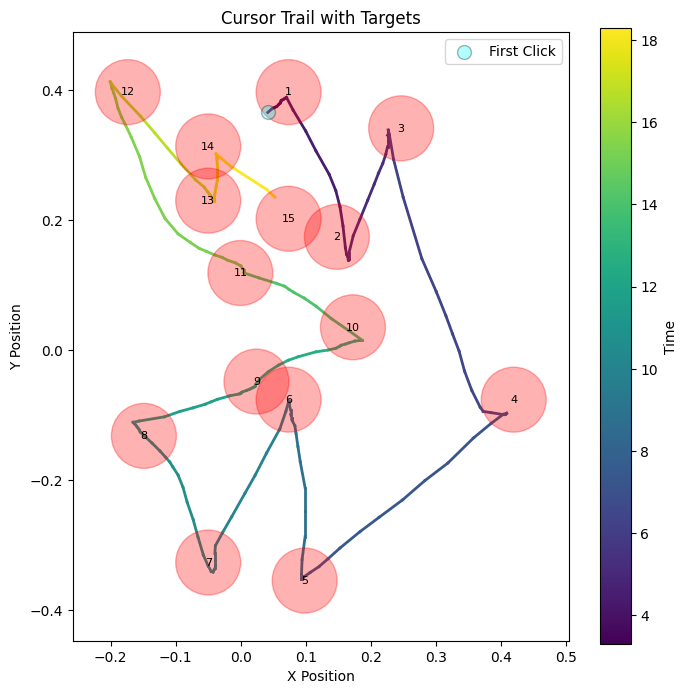

Trial ID: 2
Trial Type: TrialType.PART_B
Trial order: 15
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 1.0


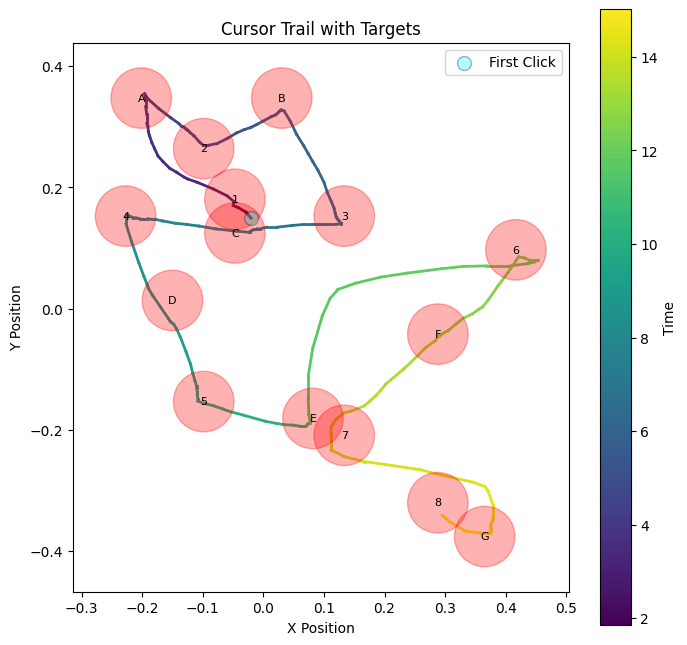

Trial ID: 3
Trial Type: TrialType.PART_A
Trial order: 16
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 5.0


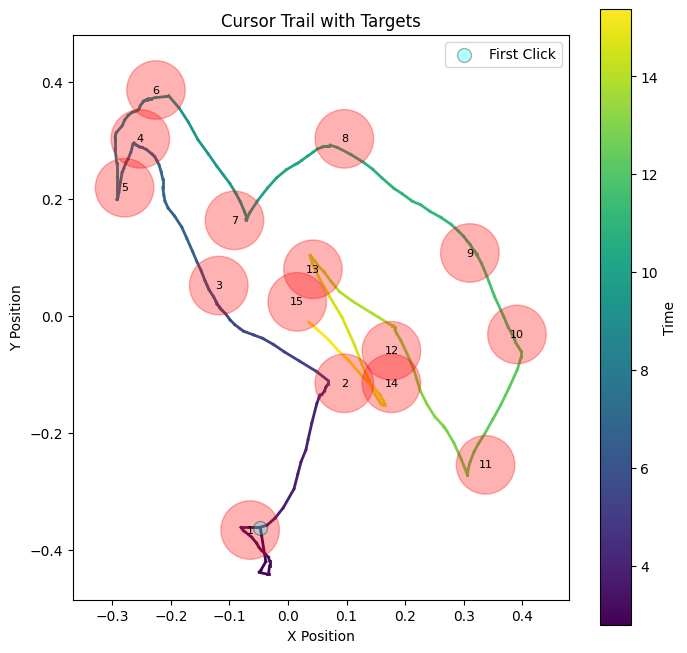

Trial ID: 8
Trial Type: TrialType.PART_B
Trial order: 17
Correct targets touches from analysis: 8.0
Wrong targets touches from analysis: 10.0


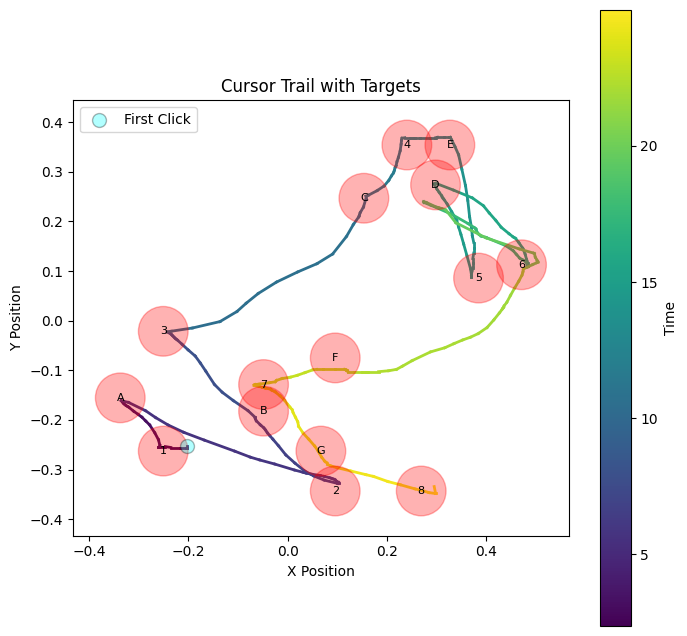

Trial ID: 6
Trial Type: TrialType.PART_A
Trial order: 18
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 2.0


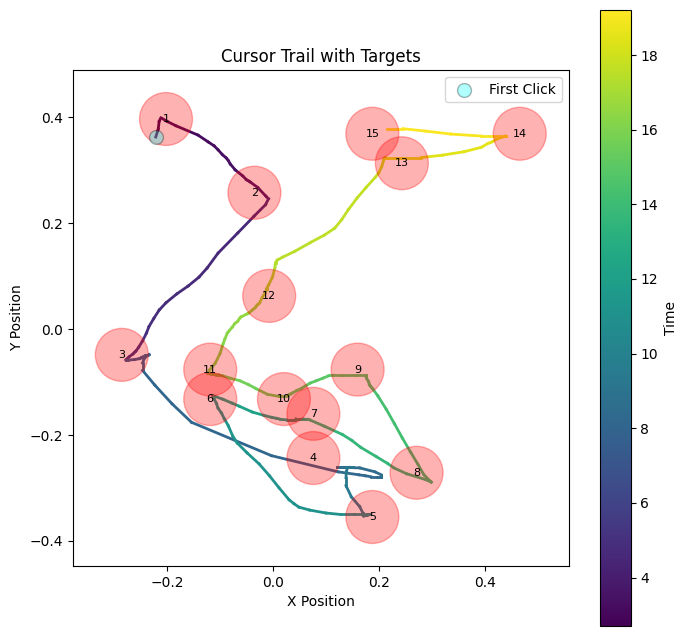

Trial ID: 4
Trial Type: TrialType.PART_B
Trial order: 19
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 2.0


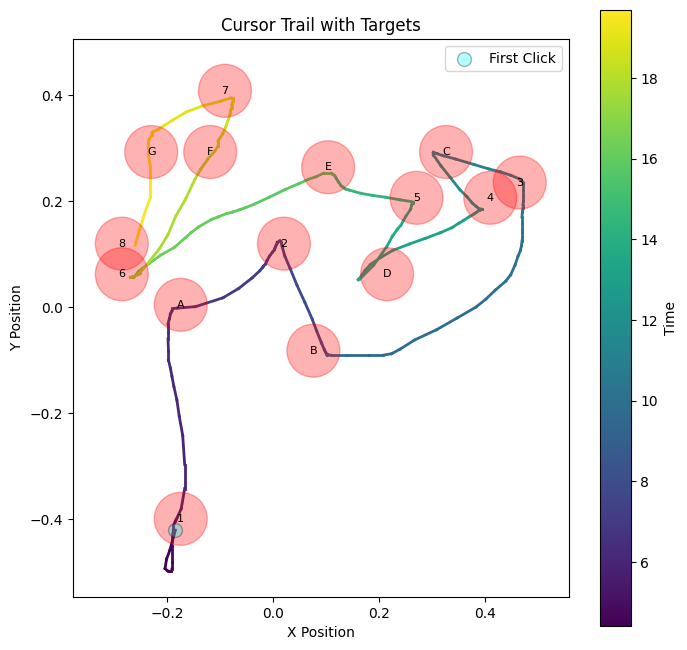

Trial ID: 19
Trial Type: TrialType.PART_A
Trial order: 20
Correct targets touches from analysis: 15.0
Wrong targets touches from analysis: 7.0


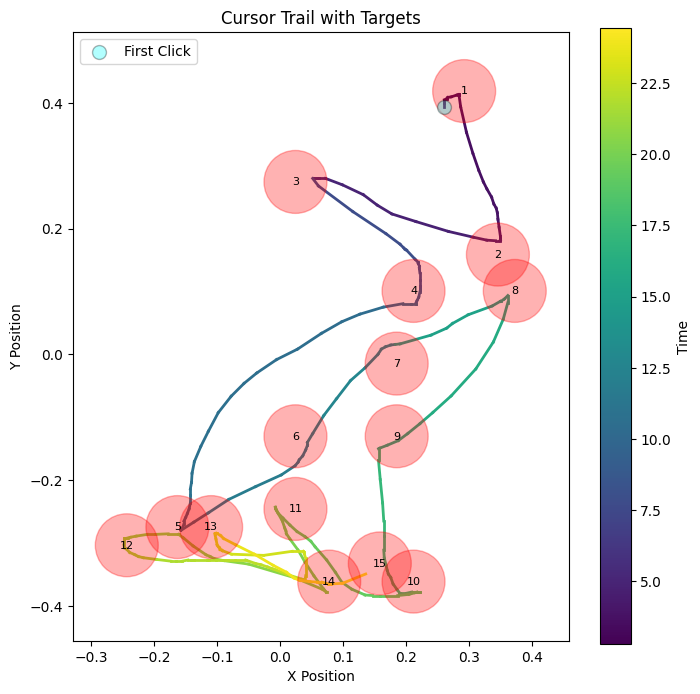

Trial ID: 21
Trial Type: TrialType.PART_B
Trial order: 21
Correct targets touches from analysis: 8.0
Wrong targets touches from analysis: 12.0


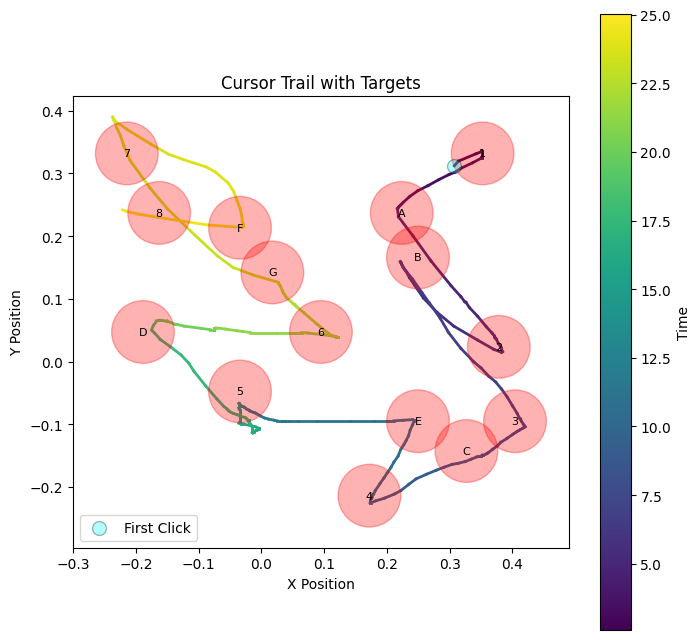

In [32]:
for trial in subject.testing_trials:
    print("Trial ID:", trial.id)
    print("Trial Type:", trial.trial_type)
    print("Trial order:", trial.order_of_appearance)
    print("Correct targets touches from analysis:", subject_analysis[subject_analysis['trial_id'] == trial.id]['correct_targets_touches'].values[0])
    print("Wrong targets touches from analysis:", subject_analysis[subject_analysis['trial_id'] == trial.id]['wrong_targets_touches'].values[0])

    plot_with_color(trial, subject.canvas_size, subject.target_radius)
    plt.show()
    
